In [1]:
import numpy as np
import astropy.units as u
from astropy.constants import m_e, M_sun, h, c 
from agnpy.emission_regions import Blob
from agnpy.targets import SSDisk, SphericalShellBLR, RingDustTorus
from agnpy.compton import cos_psi
from agnpy.absorption import sigma, Absorption
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

In [2]:
mec2 = m_e.to("erg", equivalencies=u.mass_energy())
# equivalency to transform frequencies to energies in electron rest mass units
epsilon_equivalency = [
    (u.Hz, u.Unit(""), lambda x: h.cgs * x / mec2, lambda x: x * mec2 / h.cgs)
]

In [3]:
# disk parameters
M_BH = 1.2 * 1e9 * M_sun.cgs
L_disk = 2 * 1e46 * u.Unit("erg s-1")
eta = 1 / 12
R_in = 6
R_out = 200
disk = SSDisk(M_BH, L_disk, eta, R_in, R_out, R_g_units=True)

In [4]:
# define energy array
E = np.logspace(0, 5) * u.GeV
nu = E.to("Hz", equivalencies=u.spectral())
epsilon_1 = nu.to("", equivalencies=epsilon_equivalency)

In [5]:
# define array of cosines
r = 1.1e16 * u.cm
r_tilde = (r / disk.R_g).to_value("")
mu = disk.mu_from_r_tilde(r_tilde) # range of mu we see at this distance
epsilon_disk = disk.epsilon_mu(mu, r_tilde)

In [6]:
# define a 2d matrix containing the value of s per each mu and per each E
_epsilon_1 = np.reshape(epsilon_1, (epsilon_1.size, 1))
_epsilon_disk = np.reshape(epsilon_disk, (1, epsilon_disk.size))
_mu = np.reshape(mu, (1, mu.size))
s = _epsilon_1 * _epsilon_disk / 2 * (1 - _mu)

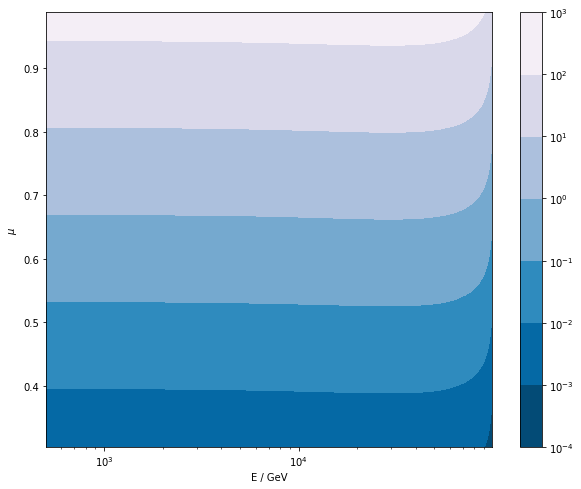

In [8]:
# plot s
fig, ax = plt.subplots(figsize=(10,8))
extent = [E[0].to_value("GeV"), E[-1].to_value("GeV"), mu[0], mu[-1]]
cs = ax.contourf(s, extent=extent, origin="lower", locator=ticker.LogLocator(), cmap=cm.PuBu_r)
ax.set_xscale("log")
ax.set_xlabel("E / GeV")
ax.set_ylabel(r"$\mu$")
plt.colorbar(cs)
plt.show()